**Data Visualizations with Python**

This document is intended to serve as a repository of various useful data visualization techniques to develop some intuituion about the data before analysis

In [1]:
# Import required libraries for plotting

# linear algebra library
import numpy as numpy 

# pandas is an open source library 
# providing high easy-to-use data structures and data analysis tools
# data processing, CSV file I/O (e.g. pandas.read_csv)
import pandas as pandas

# Seaborn is a Python visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive statistical graphics.
# Current version of seaborn generates a bunch of warnings that we'll ignore
import warnings 
warnings.filterwarnings("ignore")
import seaborn as seaborn

# matplotlib is a python 2D plotting library
%matplotlib inline
import matplotlib
import matplotlib.pyplot as matplot
seaborn.set(style="white", color_codes=True)

# Show all output and not just the last result (Jupyter by default shows the last result)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Enable writing HTML tags
from IPython.display import HTML

In [2]:
# Load the admit data
# the dataset is now a Pandas DataFrame
admitData = pandas.read_csv("./SampleAdmitData_Train.csv")

In [3]:
# The first thing we do is to bin data
gpa_bins=numpy.arange(0, 4.25, 0.25)
gpa_bin_labels=numpy.arange(0.25, 4.25, 0.25)
admitData['gpa_bin'] = pandas.cut(admitData['gpa'], gpa_bins, labels=gpa_bin_labels)

gre_bins=numpy.arange(0, 825, 50)
gre_bin_labels=numpy.arange(50, 825, 50)
admitData['gre_bin'] = pandas.cut(admitData['gre'], gre_bins, labels=gre_bin_labels)

In [4]:
# See sample data in admitData DataFrame
HTML("<b>Sample Data:<b>")
admitData.head()

# Show number of rows in admitData
HTML("<b>Row Count:<b>")
len(admitData)

# Describe the data
# Show non-null count, mean, std dev, min, max, etc
HTML("<b>Basic Data Description:<b>")
admitData.describe().round(2)

# See how many succcess or failures we have in admit column
HTML("<b>% admit:<b>")
admitData["admit"].value_counts(normalize=True).round(2)

,admit,gre,gpa,rank,gpa_bin,gre_bin
0,0,380,3.61,3,3.75,400
1,1,660,3.67,3,3.75,700
2,1,800,4.00,1,4.00,800
3,1,640,3.19,4,3.25,650
4,0,520,2.93,4,3.00,550


300

,admit,gre,gpa,rank
count,300.00,300.00,300.00,300.00
mean,0.31,590.87,3.39,2.53
std,0.46,117.72,0.37,0.96
min,0.00,300.00,2.26,1.00
25%,0.00,515.00,3.13,2.00
50%,0.00,600.00,3.39,2.00
75%,1.00,680.00,3.64,3.00
max,1.00,800.00,4.00,4.00


0    0.69
1    0.31
Name: admit, dtype: float64

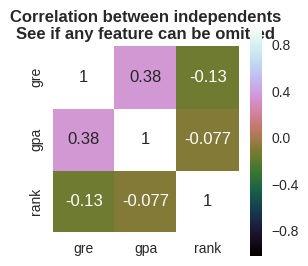

In [5]:
# Show correlation between various features (gre, rank, gpa)
# If two variables are highly correlated, we might want to use just one of them
correlation = admitData.drop("admit", axis=1).corr();
matplot.figure(figsize=(3,3));
seaborn.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');
matplot.title('Correlation between independents\nSee if any feature can be omitted',fontweight="bold");

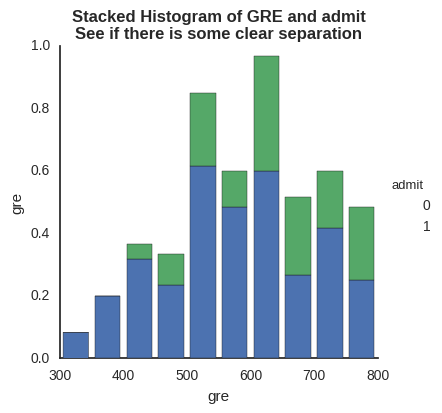

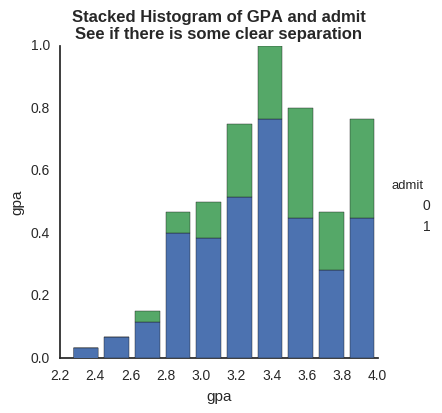

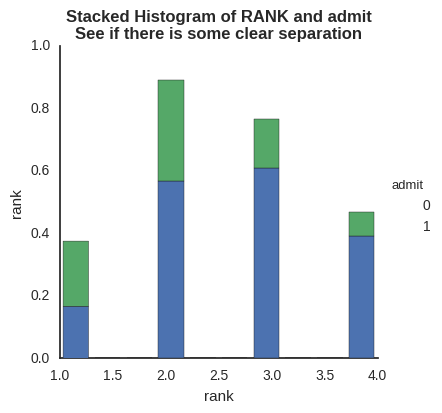

In [6]:
# Let's look at the density of the of admit as function of the number of gre score
# seaborn.FacetGrid(admitData, hue="admit", size=4).map(matplot.hist, "gre").add_legend();
seaborn.pairplot(admitData, hue="admit", vars=["gre"], size=4)
matplot.title('Stacked Histogram of GRE and admit\nSee if there is some clear separation', fontweight="bold");

seaborn.pairplot(admitData, hue="admit", vars=["gpa"], size=4)
matplot.title('Stacked Histogram of GPA and admit\nSee if there is some clear separation', fontweight="bold");

seaborn.pairplot(admitData, hue="admit", vars=["rank"], size=4)
matplot.title('Stacked Histogram of RANK and admit\nSee if there is some clear separation', fontweight="bold");

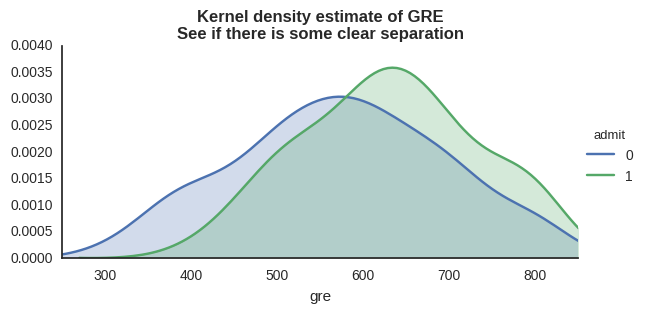

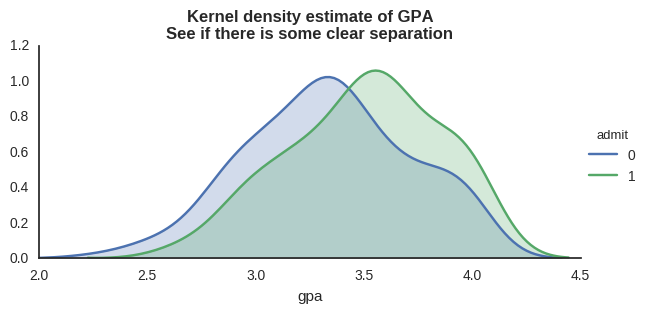

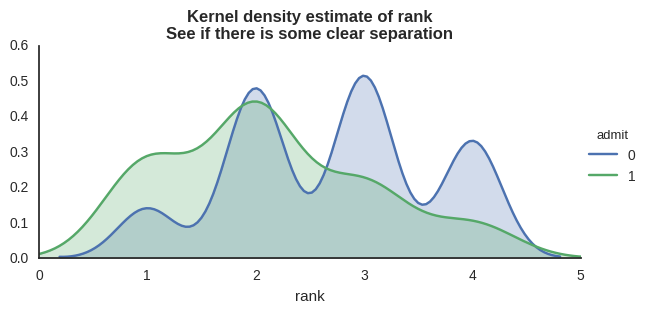

In [7]:
# Kernel Density estimate for the data based on univariate estimate

# Based on GRE
seaborn.FacetGrid(admitData, hue="admit", aspect=2, xlim=(250, 850)).map(seaborn.kdeplot,'gre',shade= True).add_legend();
matplot.title('Kernel density estimate of GRE\nSee if there is some clear separation', fontweight="bold");

# Based on GPA
seaborn.FacetGrid(admitData, hue="admit", aspect=2, xlim=(2, 4.5)).map(seaborn.kdeplot,'gpa',shade= True).add_legend();
matplot.title('Kernel density estimate of GPA\nSee if there is some clear separation', fontweight="bold");

# Based on RANK
seaborn.FacetGrid(admitData, hue="admit", aspect=2, xlim=(0,5)).map(seaborn.kdeplot,'rank',shade= True).add_legend();
matplot.title('Kernel density estimate of rank\nSee if there is some clear separation', fontweight="bold");

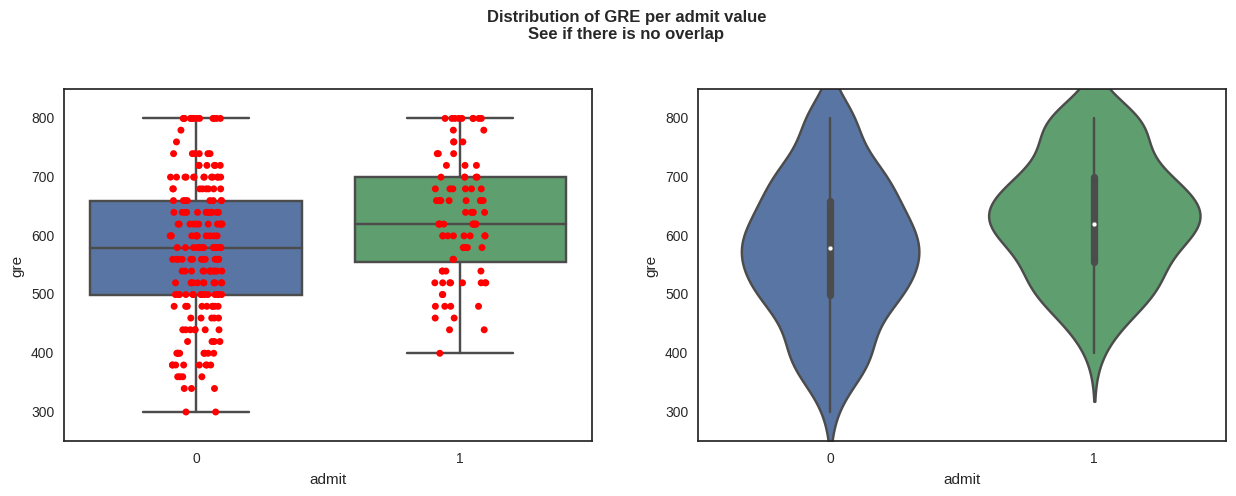

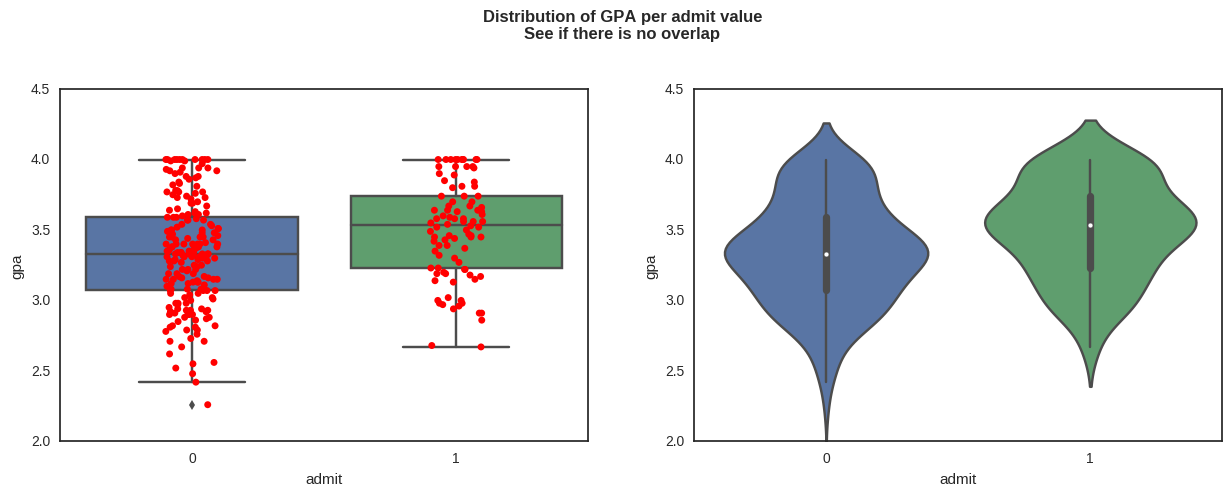

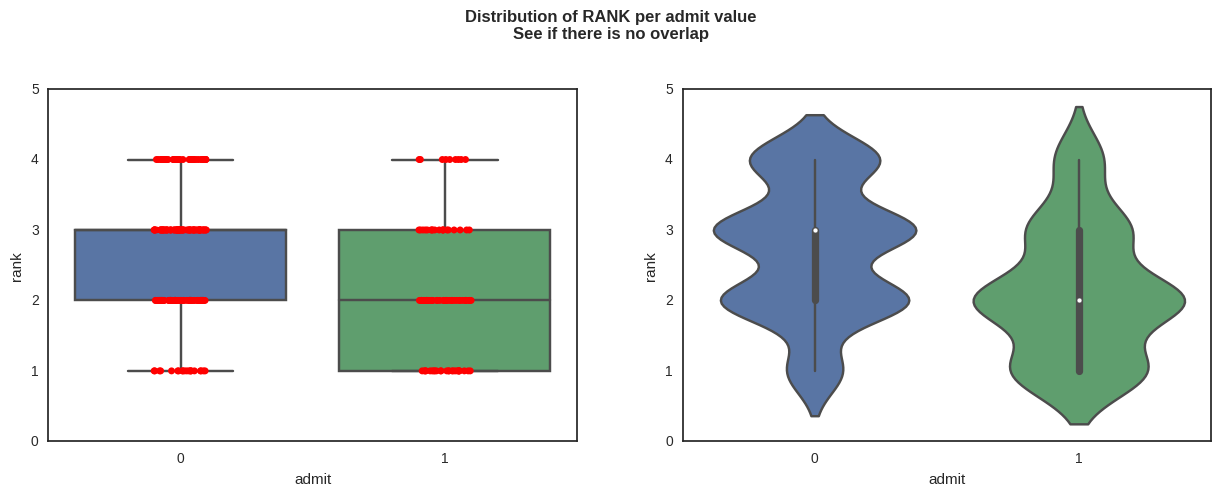

In [8]:
# We can look at an individual feature in Seaborn through a boxplot
# PS: We'll use jitter=True so that all the points don't fall in single vertical lines
# We also use a violin plot, which simplifies the boxplot where denser regions are fatter and sparser thiner 

# Plot gre against admit
fig = matplot.figure(figsize=(15,10));
ax1 = fig.add_subplot(221);
fig.suptitle("Distribution of GRE per admit value\nSee if there is no overlap",fontweight="bold", fontsize=12);
plt = seaborn.boxplot(x="admit", y="gre", data=admitData);
plt = seaborn.stripplot(x="admit", y="gre", data=admitData, jitter=True, edgecolor="gray", color="red");
matplot.ylim(250, 850);

ax1 = fig.add_subplot(222);
plt = seaborn.violinplot(x="admit", y="gre", data=admitData);
matplot.ylim(250, 850);

# Plot gpa against admit
fig = matplot.figure(figsize=(15,10));
ax1 = fig.add_subplot(221);
fig.suptitle("Distribution of GPA per admit value\nSee if there is no overlap",fontweight="bold", fontsize=12);
plt = seaborn.boxplot(x="admit", y="gpa", data=admitData);
plt = seaborn.stripplot(x="admit", y="gpa", data=admitData, jitter=True, edgecolor="gray", color="red");
matplot.ylim(2, 4.5);

ax1 = fig.add_subplot(222);
plt = seaborn.violinplot(x="admit", y="gpa", data=admitData);
matplot.ylim(2, 4.5);

# Plot rank against admit
fig = matplot.figure(figsize=(15,10));
ax1 = fig.add_subplot(221);
fig.suptitle("Distribution of RANK per admit value\nSee if there is no overlap",fontweight="bold", fontsize=12);
plt = seaborn.boxplot(x="admit", y="rank", data=admitData);
plt = seaborn.stripplot(x="admit", y="rank", data=admitData, jitter=True, edgecolor="gray", color="red");
matplot.ylim(0, 5);

ax1 = fig.add_subplot(222);
plt = seaborn.violinplot(x="admit", y="rank", data=admitData);
matplot.ylim(0, 5);

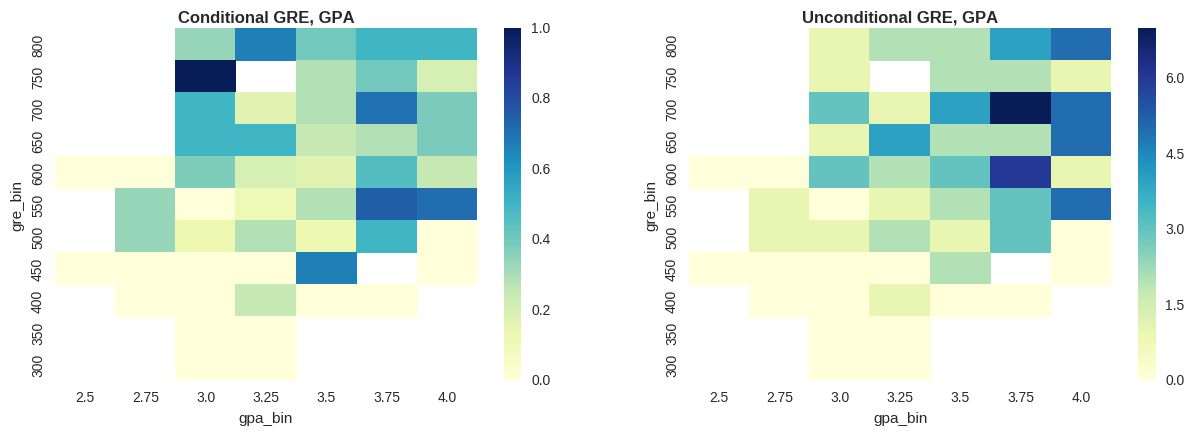

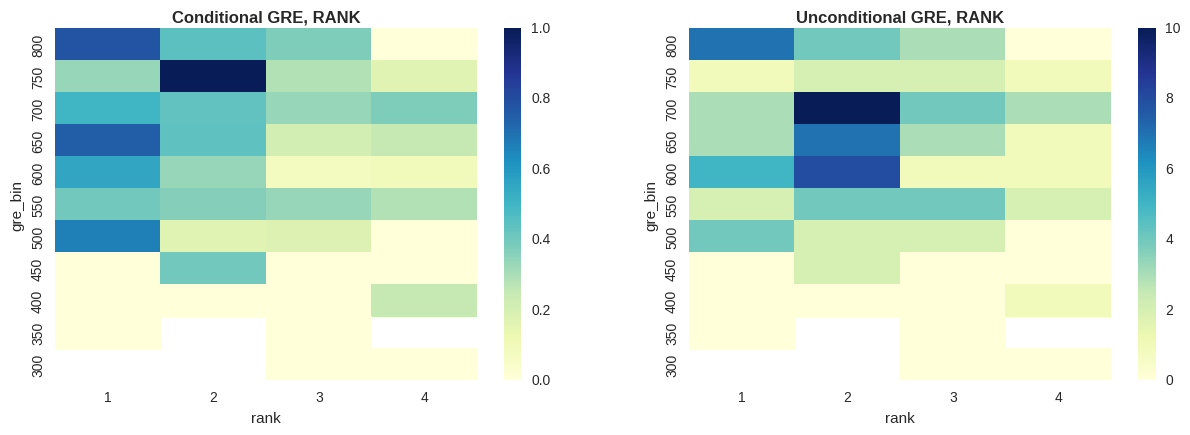

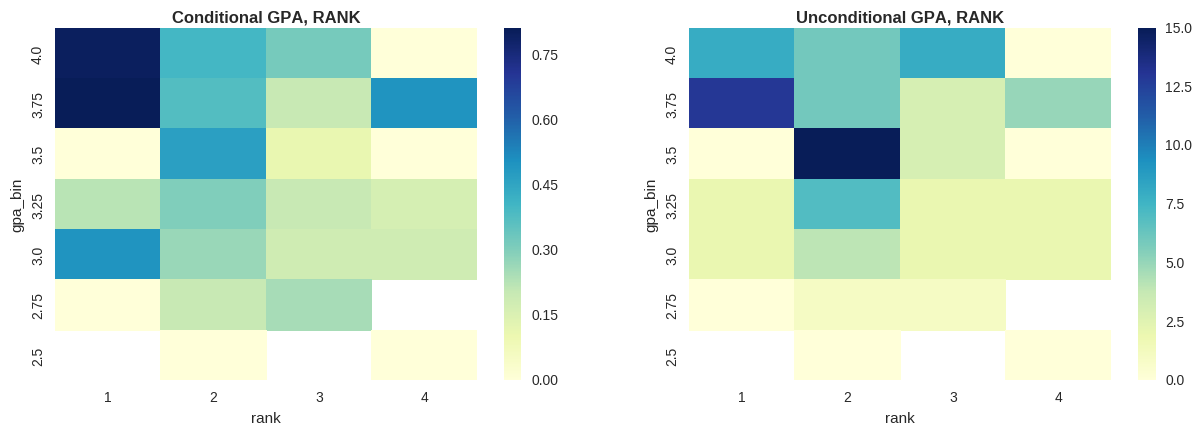

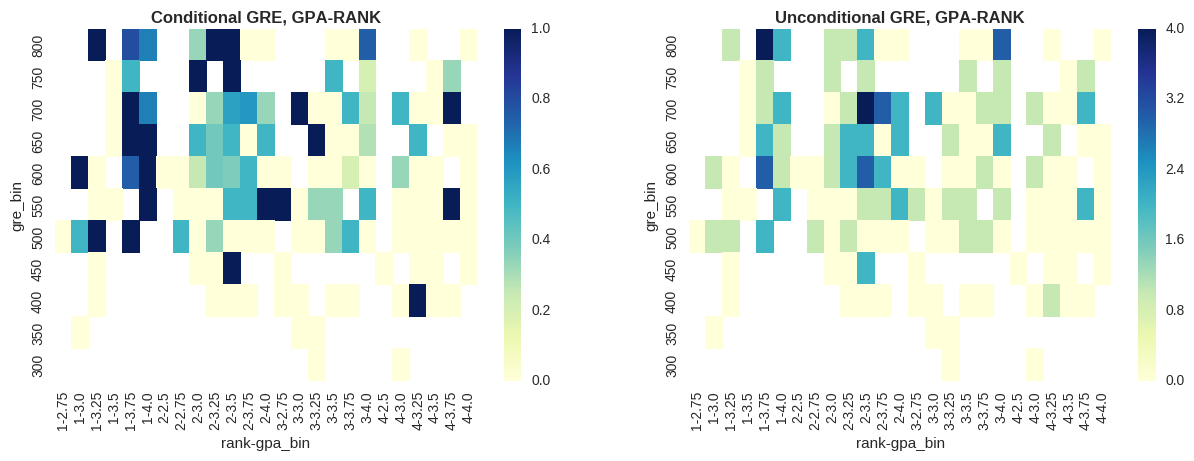

In [9]:
# Create a heatmap to display conditional and 
# unconditional distribution of admits for two variables looked together

# First we need to create pivot tables to get the data in correct form before displaying
gregpa_cond = pandas.pivot_table(admitData, values='admit', index=['gre_bin'], 
                                  columns=['gpa_bin'], aggfunc=numpy.mean
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')
gregpa_uncond = pandas.pivot_table(admitData, values='admit', index=['gre_bin'], 
                                  columns=['gpa_bin'], aggfunc=numpy.sum
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')

grerank_cond = pandas.pivot_table(admitData, values='admit', index=['gre_bin'], 
                                  columns=['rank'], aggfunc=numpy.mean
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')
grerank_uncond = pandas.pivot_table(admitData, values='admit', index=['gre_bin'], 
                                  columns=['rank'], aggfunc=numpy.sum
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')

gparank_cond = pandas.pivot_table(admitData, values='admit', index=['gpa_bin'], 
                                  columns=['rank'], aggfunc=numpy.mean
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')
gparank_uncond = pandas.pivot_table(admitData, values='admit', index=['gpa_bin'], 
                                  columns=['rank'], aggfunc=numpy.sum
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')

gpagrerank_cond = pandas.pivot_table(admitData, values='admit', index=['gre_bin'], 
                                  columns=['rank', 'gpa_bin'], aggfunc=numpy.mean
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')
gpagrerank_uncond = pandas.pivot_table(admitData, values='admit', index=['gre_bin'], 
                                  columns=['rank', 'gpa_bin'], aggfunc=numpy.sum
                                ).dropna(axis=0,how='all').dropna(axis=1,how='all')


# GRE, GPA and color by admit
fig = matplot.figure(figsize=(15,10));
ax1 = fig.add_subplot(221);
ax = seaborn.heatmap(gregpa_cond, cmap="YlGnBu");
matplot.title('Conditional GRE, GPA', fontweight="bold");
ax.invert_yaxis();

ax1 = fig.add_subplot(222);
ax = seaborn.heatmap(gregpa_uncond, cmap="YlGnBu");
matplot.title('Unconditional GRE, GPA', fontweight="bold");
ax.invert_yaxis();

# GRE, Rank and color by admit
fig = matplot.figure(figsize=(15,10));
ax1 = fig.add_subplot(221);
ax = seaborn.heatmap(grerank_cond, cmap="YlGnBu");
matplot.title('Conditional GRE, RANK', fontweight="bold");
ax.invert_yaxis();

ax1 = fig.add_subplot(222);
ax = seaborn.heatmap(grerank_uncond, cmap="YlGnBu");
matplot.title('Unconditional GRE, RANK', fontweight="bold");
ax.invert_yaxis();

# GPA, Rank and color by admit
fig = matplot.figure(figsize=(15,10));
ax1 = fig.add_subplot(221);
ax = seaborn.heatmap(gparank_cond, cmap="YlGnBu");
matplot.title('Conditional GPA, RANK', fontweight="bold");
ax.invert_yaxis();

ax1 = fig.add_subplot(222);
ax = seaborn.heatmap(gparank_uncond, cmap="YlGnBu");
matplot.title('Unconditional GPA, RANK', fontweight="bold");
ax.invert_yaxis();


# GPA, Rank and color by admit
fig = matplot.figure(figsize=(15,10));
ax1 = fig.add_subplot(221);
ax = seaborn.heatmap(gpagrerank_cond, cmap="YlGnBu");
matplot.title('Conditional GRE, GPA-RANK', fontweight="bold");
ax.invert_yaxis();

ax1 = fig.add_subplot(222);
ax = seaborn.heatmap(gpagrerank_uncond, cmap="YlGnBu");
matplot.title('Unconditional GRE, GPA-RANK', fontweight="bold");
ax.invert_yaxis();


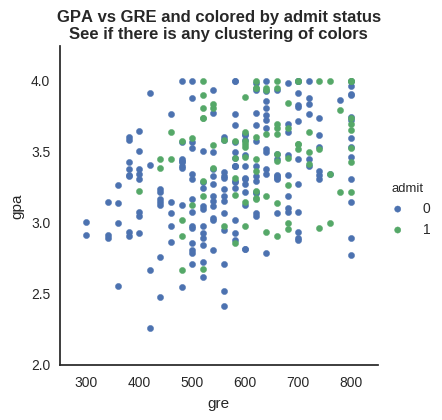

In [10]:
# Do a simple scatter plot between gre and gpa
# We want to see if high gre corresponds to a high gpa
# Also, color the scatterplot by admit value to see if there is clustering in colors

seaborn.FacetGrid(admitData, hue="admit", size=4, ylim=(2, 4.25), xlim=(250, 850)).map(matplot.scatter, "gre", "gpa").add_legend();
matplot.title('GPA vs GRE and colored by admit status\nSee if there is any clustering of colors', fontweight="bold");

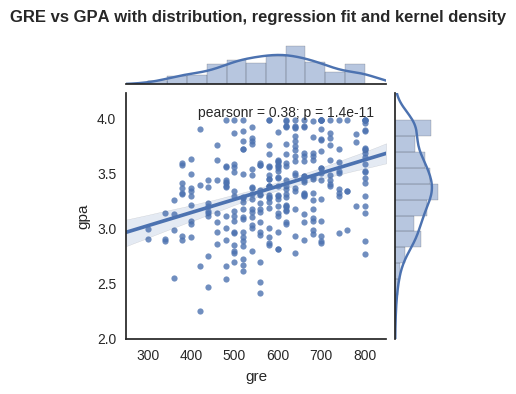

In [11]:
# Add regression and kernel density fits to the chart for gre vs gpa
# This shows relationship between gre and gpa
plt = seaborn.jointplot(x="gre", y="gpa", data=admitData, kind="reg", ylim=(2, 4.25), xlim=(250, 850), size=4);
matplot.subplots_adjust(top=0.9);
plt.fig.suptitle("GRE vs GPA with distribution, regression fit and kernel density",fontweight="bold");
matplot.show(plt);

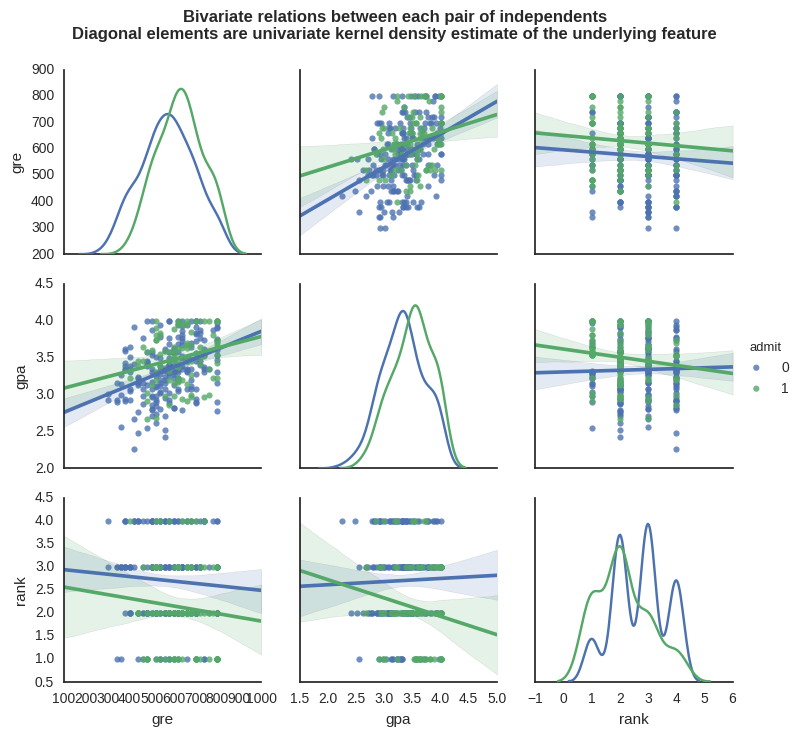

In [12]:
# Show the bivariate relation between each pair of features
# diagonal elements are univariate kernel density estimate of the underlying feature
plt = seaborn.pairplot(admitData, hue="admit", vars=["gre","gpa","rank"], kind="reg", diag_kind="kde")
matplot.subplots_adjust(top=0.9)
plt.fig.suptitle('Bivariate relations between each pair of independents\n'\
                'Diagonal elements are univariate kernel density estimate of the underlying feature\n',
                fontweight="bold"
               )
matplot.show(plt)

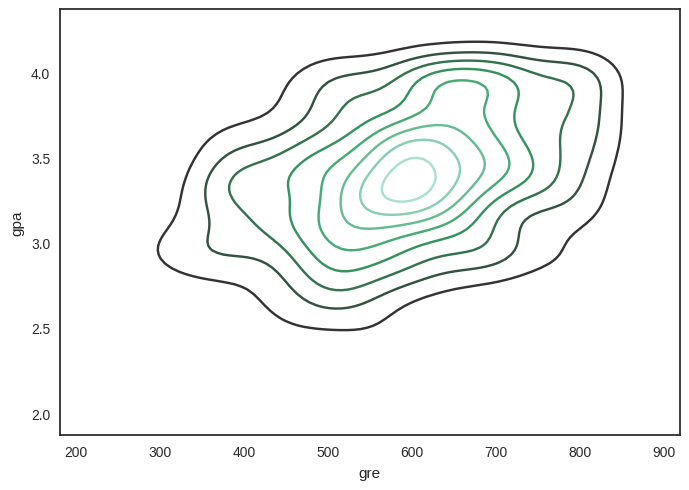

In [13]:
seaborn.kdeplot(admitData["gre"], admitData["gpa"])